In [1]:
pip install grader==1

Note: you may need to restart the kernel to use updated packages.


In [2]:

# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np
import pandas as pd
# Plotting library
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces

# library written for this exercise providing additional functions for assignment submission, and others
import utils 

# tells matplotlib to embed plots within the notebook
%matplotlib inline

### Warmup excercise

In [3]:
def warmUpExercise():
    """
    Example function in Python which computes the identity matrix.
    
    Returns
    -------
    A : array_like
        The 5x5 identity matrix.
    
    Instructions
    ------------
    Return the 5x5 identity matrix.
    """    
    A = [] 
    A=np.eye(5)
   
    return A



In [4]:
warmUpExercise()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

### Linear regression with one variable - Univariate

In [91]:
data = pd.read_csv('ex1data1.txt', sep=",", header=None)
#data=np.loadtxt(('ex1data1.txt'), delimiter=",")

In [92]:
data.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [93]:
data.columns=["profits", "population"]

In [94]:
data.head()

,profits,population
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [95]:
X,y=data["profits"], data["population"]

In [96]:
print(X.shape)

(97,)


In [97]:
data.count()

profits       97
population    97
dtype: int64

In [98]:
m=data.shape[0]
print("number of training examples=",m)

number of training examples= 97


###### plotting the data

In [99]:
def plotData(x, y):
    """
    Plots the data points x and y into a new figure. Plots the data 
    points and gives the figure axes labels of population and profit.
    
    Parameters
    ----------
    x : array_like
        Data point values for x-axis.

    y : array_like
        Data point values for y-axis. Note x and y should have the same size.
    
    Instructions
    ------------
    Plot the training data into a figure using the "figure" and "plot"
    functions. Set the axes labels using the "xlabel" and "ylabel" functions.
    Assume the population and revenue data have been passed in as the x
    and y arguments of this function.    
    
    Hint
    ----
    You can use the 'ro' option with plot to have the markers
    appear as red circles. Furthermore, you can make the markers larger by
    using plot(..., 'ro', ms=10), where `ms` refers to marker size. You 
    can also set the marker edge color using the `mec` property.
    """
    fig = pyplot.figure()  # open a new figure
    
    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Profit in $10,000')
    pyplot.xlabel('Population of City in 10,000s')

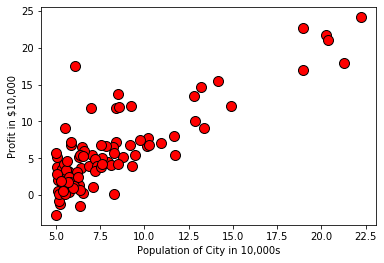

In [100]:
plotData(X, y)

###### Compute cost

In [101]:
# Add a column of ones to X. The numpy function stack joins arrays along a given axis. 
# The first axis (axis=0) refers to rows (training examples) 
# and second axis (axis=1) refers to columns (features).
#kind of like reshape but reshape doesn't work on numpy arrays
X = X[:,np.newaxis] 
print(X.shape)
y = y[:,np.newaxis]
print(y.shape)
theta = np.zeros([2,1])
iterations = 1500
alpha = 0.01
ones = np.ones((m,1))
X = np.hstack((ones, X))  

(97, 1)
(97, 1)


In [102]:
def computeCost(X, y, theta):
    temp = np.dot(X, theta) - y
    return np.sum(np.power(temp, 2)) / (2*m)

J = computeCost(X, y, theta)
print(J)

32.072733877455676


###### Finding the optimal parameters using Gradient Descent

In [103]:
#params_arr=[]
def gd(X,y,theta, alpha, iterations):
    for _ in range(iterations):
        temp=np.dot(X, theta)-y
        temp=np.dot(X.T, temp)
        theta=theta - (alpha/m) * temp
        params_arr.append(theta)
    return theta
    
params=gd(X, y, theta, alpha, iterations)
print(params)
'''
def gradientDescent(X, y, theta, alpha, iterations):
    for _ in range(iterations):
        temp = np.dot(X, theta) - y
        
        temp = np.dot(X.T, temp)
        
        theta = theta - (alpha/m) * temp
    return theta
theta = gradientDescent(X, y, theta, alpha, iterations)
print(theta)
'''


[[-3.63029144]
 [ 1.16636235]]


'\ndef gradientDescent(X, y, theta, alpha, iterations):\n    for _ in range(iterations):\n        temp = np.dot(X, theta) - y\n        \n        temp = np.dot(X.T, temp)\n        \n        theta = theta - (alpha/m) * temp\n    return theta\ntheta = gradientDescent(X, y, theta, alpha, iterations)\nprint(theta)\n'

###### Recalculating the cost after G.D.

In [104]:
J = computeCost(X, y, params)
print(J)

4.483388256587726


###### Plotting the line along the data

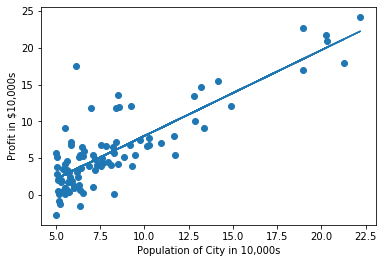

In [105]:
import matplotlib.pyplot as plt

plt.scatter(X[:,1], y)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.plot(X[:,1], np.dot(X, params))
plt.show()

###### Showing the contour plot - Missing

In [106]:
#Contour plot code

C:\Users\BUGALIA\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: No contour levels were found within the data range.


<Figure size 432x288 with 0 Axes>

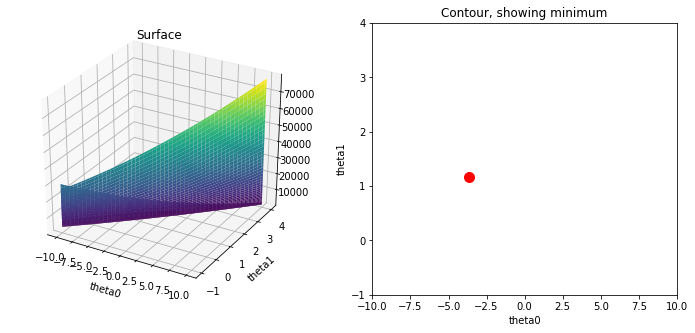

In [107]:
# grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

# Fill out J_vals
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        
        J_vals[i, j] = computeCost(X, y, [theta0, theta1])
        
# Because of the way meshgrids work in the surf command, we need to
# transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals.T

# surface plot
pyplot.clf()
fig = pyplot.figure(figsize=(12, 5))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.title('Surface')

# contour plot
# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
ax = pyplot.subplot(122)
pyplot.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')

pyplot.plot(params[0], params[1], 'ro', ms=10, lw=2)
pyplot.title('Contour, showing minimum')
pass

### Multivariate linear regression - Optional 

In [77]:
data = pd.read_csv('ex1data2.txt', sep=",", header=None)
#data=np.loadtxt(('ex1data1.txt'), delimiter=",")

In [78]:
data.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [79]:
data.columns=["size", "bedroom", "price"]

In [80]:
X=data.drop("price", axis=1)
y=data["price"]

In [81]:
m=len(y)

###### Feature normalization

In [82]:
X["size"]=(X["size"]-np.mean(X["size"]))/np.std(X["size"])

In [83]:
X["bedroom"]=(X["bedroom"]-np.mean(X["bedroom"]))/np.std(X["bedroom"])

###### initialization & pre-processing

In [84]:
y=y[:, np.newaxis]
ones=np.ones((m,1))
X=np.hstack((ones, X))
theta=np.zeros((3,1))
alpha = 0.01
iterations = 400

###### Compute the cost

In [85]:
def cost(X, y, theta):
    hypothesis=np.dot(X, theta)
    tot_cost=np.sum(np.power((hypothesis-y),2))/(2*m)
    return tot_cost
cost=cost(X, y, theta)
print(cost)

65591548106.45744


###### Finding optimal params through gradient descent

In [86]:
params_arr=[]
def gd(X,y,theta, alpha, iterations):
    for _ in range(iterations):
        temp=np.dot(X, theta)-y
        temp=np.dot(X.T, temp)
        theta=theta - (alpha/m) * temp
        params_arr.append(theta)
    return theta
    
params=gd(X, y, theta, alpha, iterations)
print(params)

[[334302.06399328]
 [ 99411.44947359]
 [  3267.01285407]]


###### Finding optimized cost

In [87]:
J = computeCost(X, y, params)
print(J)

2105448288.6292474


###### Plotting the cost through iterations

In [88]:
cost_arr=[]
iter_arr=[]
for index,i in enumerate(range(iterations)):
    J = computeCost(X, y, params_arr[i])
    iter_arr.append(index+1)
    cost_arr.append(J)

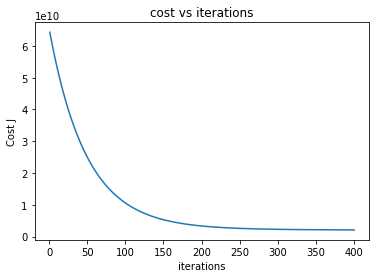

In [89]:
plt.plot(iter_arr, cost_arr)
plt.title("cost vs iterations")
plt.xlabel("iterations")
plt.ylabel("Cost J")
plt.show()

###### Normal equation